In [1]:
import sys
sys.path.append('/users/mtomov13/.conda/envs/venv/lib/python3.6/site-packages/')
print(sys.path)

['/opt/conda/root/lib/python36.zip', '/opt/conda/root/lib/python3.6', '/opt/conda/root/lib/python3.6/lib-dynload', '', '/opt/conda/root/lib/python3.6/site-packages', '/opt/conda/root/lib/python3.6/site-packages/IPython/extensions', '/users/mtomov13/.ipython', '/users/mtomov13/.conda/envs/venv/lib/python3.6/site-packages/']


In [6]:
import os
import glob
import pandas as pd

# ImaGES (Ramsey et al. 2010) is the algo for group-level causal inference, recommended by Russ Poldrack Handbook of fMRI, sec 8.3.3 pg. 152
# https://github.com/bd2kccd/py-causal/blob/development/example/py-causal%20-ImaGES%20Continuous%20in%20Action.ipynb
# see https://www.ccd.pitt.edu/tools/     and    https://bd2kccd.github.io/docs/py-causal/ to setup

dfs = []
tetrad_images_dir = os.path.join(os.getcwd(), 'feedback_onset')
for d in glob.glob(tetrad_images_dir + os.sep + "*.txt"):
    print (d)
    df = pd.read_table(d, sep="\t")
    dfs.append(df)

/net/rcss2/srv/export/gershman/share_root/Lab/scripts/matlab/Hayley/feedback_onset/feedback_onset_SPMsubj1.txt
/net/rcss2/srv/export/gershman/share_root/Lab/scripts/matlab/Hayley/feedback_onset/feedback_onset_SPMsubj2.txt
/net/rcss2/srv/export/gershman/share_root/Lab/scripts/matlab/Hayley/feedback_onset/feedback_onset_SPMsubj4.txt
/net/rcss2/srv/export/gershman/share_root/Lab/scripts/matlab/Hayley/feedback_onset/feedback_onset_SPMsubj5.txt
/net/rcss2/srv/export/gershman/share_root/Lab/scripts/matlab/Hayley/feedback_onset/feedback_onset_SPMsubj6.txt
/net/rcss2/srv/export/gershman/share_root/Lab/scripts/matlab/Hayley/feedback_onset/feedback_onset_SPMsubj8.txt
/net/rcss2/srv/export/gershman/share_root/Lab/scripts/matlab/Hayley/feedback_onset/feedback_onset_SPMsubj9.txt
/net/rcss2/srv/export/gershman/share_root/Lab/scripts/matlab/Hayley/feedback_onset/feedback_onset_SPMsubj10.txt
/net/rcss2/srv/export/gershman/share_root/Lab/scripts/matlab/Hayley/feedback_onset/feedback_onset_SPMsubj11.txt

In [7]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

In [8]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.listIndTests() # vi ~/.conda/envs/venv/lib/python3.6/site-packages/pycausal/search.py, comment out .sort()

disc-bic
g-square
sem-bic
d-sep
bdeu
mixed-var-polynominal-likelihood-ratio
cond-correlation
multinomial-logistic-regression-likelihood-ratio
correlation-t
fisher-z
cond-gauss-lrt
chi-square
multinomial-logistic-regression-wald


In [9]:
tetrad.getAlgorithmParameters(algoId = 'imgs_cont', testId = 'fisher-z')

penaltyDiscount: Penalty discount (min = 0.0) (java.lang.Double) [default:2.0]
faithfulnessAssumed: Yes if (one edge) faithfulness should be assumed (java.lang.Boolean) [default:true]
symmetricFirstStep: Yes if the first step step for FGES should do scoring for both X->Y and Y->X (java.lang.Boolean) [default:false]
maxDegree: The maximum degree of the graph (min = -1) (java.lang.Integer) [default:100]
verbose: Yes if verbose output should be printed or logged (java.lang.Boolean) [default:false]
bootstrapSampleSize: The number of bootstraps (min = 0) (java.lang.Integer) [default:0]
bootstrapEnsemble: Ensemble method: Preserved (0), Highest (1), Majority (2) (java.lang.Integer) [default:1]
numRuns: The number runs (java.lang.Integer) [default:1]
randomSelectionSize: The number of datasets that should be taken in each random sample (java.lang.Integer) [default:1]
bootstrapSampleSize: The number of bootstraps (min = 0) (java.lang.Integer) [default:0]
bootstrapEnsemble: Ensemble method: Pre

In [10]:
tetrad.run(algoId = 'imgs_cont', dfs = dfs, testId = 'fisher-z', verbose = True)

In [11]:
tetrad.getNodes()

['MTG', 'Put', 'VS']

In [12]:
tetrad.getEdges()

['VS --- MTG', 'MTG --- Put']

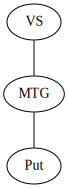

In [13]:
import pydot
from IPython.display import SVG
#dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
#dot_str = tetrad.getDot()
#graphs = pydot.graph_from_dot_data(dot_str)
graphs = [tetrad.getDot()]
svg_str = graphs[0].create_svg()
SVG(svg_str)

In [14]:
graphs[0].__dict__

{'obj_dict': {'attributes': {},
  'name': 'G',
  'type': 'digraph',
  'strict': False,
  'suppress_disconnected': False,
  'simplify': False,
  'current_child_sequence': 3,
  'nodes': {},
  'edges': {('MTG',
    'Put'): [{'points': ('MTG', 'Put'),
     'attributes': {'arrowhead': 'none'},
     'type': 'edge',
     'parent_graph': <pydot.Dot at 0x2b56c2a2ecf8>,
     'parent_edge_list': None,
     'sequence': 1}],
   ('VS',
    'MTG'): [{'points': ('VS', 'MTG'),
     'attributes': {'arrowhead': 'none'},
     'type': 'edge',
     'parent_graph': <pydot.Dot at 0x2b56c2a2ecf8>,
     'parent_edge_list': None,
     'sequence': 2}]},
  'subgraphs': {},
  'parent_graph': <pydot.Dot at 0x2b56c2a2ecf8>},
 'set_colorscheme': <function pydot.Common.create_attribute_methods.<locals>.<lambda>(x, a='colorscheme')>,
 'get_colorscheme': <function pydot.Common.create_attribute_methods.<locals>.<lambda>(a='colorscheme')>,
 'set_esep': <function pydot.Common.create_attribute_methods.<locals>.<lambda>(x, a=